In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import data
import plot
import fit_aorta

from models.liver_cal_hf2cm_var22 import TwoShotTwoScan as Liver


Read data

In [2]:
filepath = os.path.abspath("")
datapath = os.path.join(filepath, 'devdata')
resultspath = os.path.join(filepath, 'devresults')
output_file = os.path.join(resultspath, 'parameters.csv')
resultsfolder = os.path.dirname(output_file)
s = os.listdir(datapath)[0]
subj = os.path.join(datapath, s)
subj_data = data.twoshot_twoscan(subj)
(   time1, fa1, aorta1, liver1, portal1,
    aorta_valid1, liver_valid1, portal_valid1,
    time2, fa2, aorta2, liver2, portal2,
    aorta_valid2, liver_valid2, portal_valid2,
    T1time1, T1aorta1, T1liver1, T1portal1,
    T1time2, T1aorta2, T1liver2, T1portal2,
    T1time3, T1aorta3, T1liver3, T1portal3, 
    weight, dose1, dose2) = subj_data

Read fitted aorta

In [3]:
visit = 'baseline'
aortaresults = os.path.join(filepath, 'results_aorta') 
aortapars = os.path.join(aortaresults, s[:3] + '_' + visit + '.csv')
aorta = fit_aorta.read(subj_data, aortapars)

Reading aorta...


Fit liver


In [4]:
# Fit liver
liver = Liver(aorta)
# Set data
xvalid = np.concatenate([liver_valid1, liver_valid2, np.full(3, True)])
liver.set_x(time1, time2, [T1time1,T1time2,T1time3], valid=xvalid)
liver.set_y(liver1, liver2, [1000.0/T1liver1, 1000.0/T1liver2, 1000.0/T1liver3])
# Set fit options

liver.ptol = 1e-6
#liver.set_cweight(1e-3)

In [5]:
liver.reset_p()
liver.estimate_p()
print(liver.R10, liver.S01, liver.S02)
print(liver.p.loc[:,'value'])

1.240202389766453 1309.0301712535916 1508.9879540343538
symbol
FA1_corr     1.000000
FA2_corr     1.000000
S01_corr     1.000000
S02_corr     1.000000
Tdel         5.000000
Te          30.000000
ve           0.300000
k_he_i       0.003333
k_he_f       0.003333
Kbh_i        0.000556
Kbh_f        0.000556
Name: value, dtype: float64


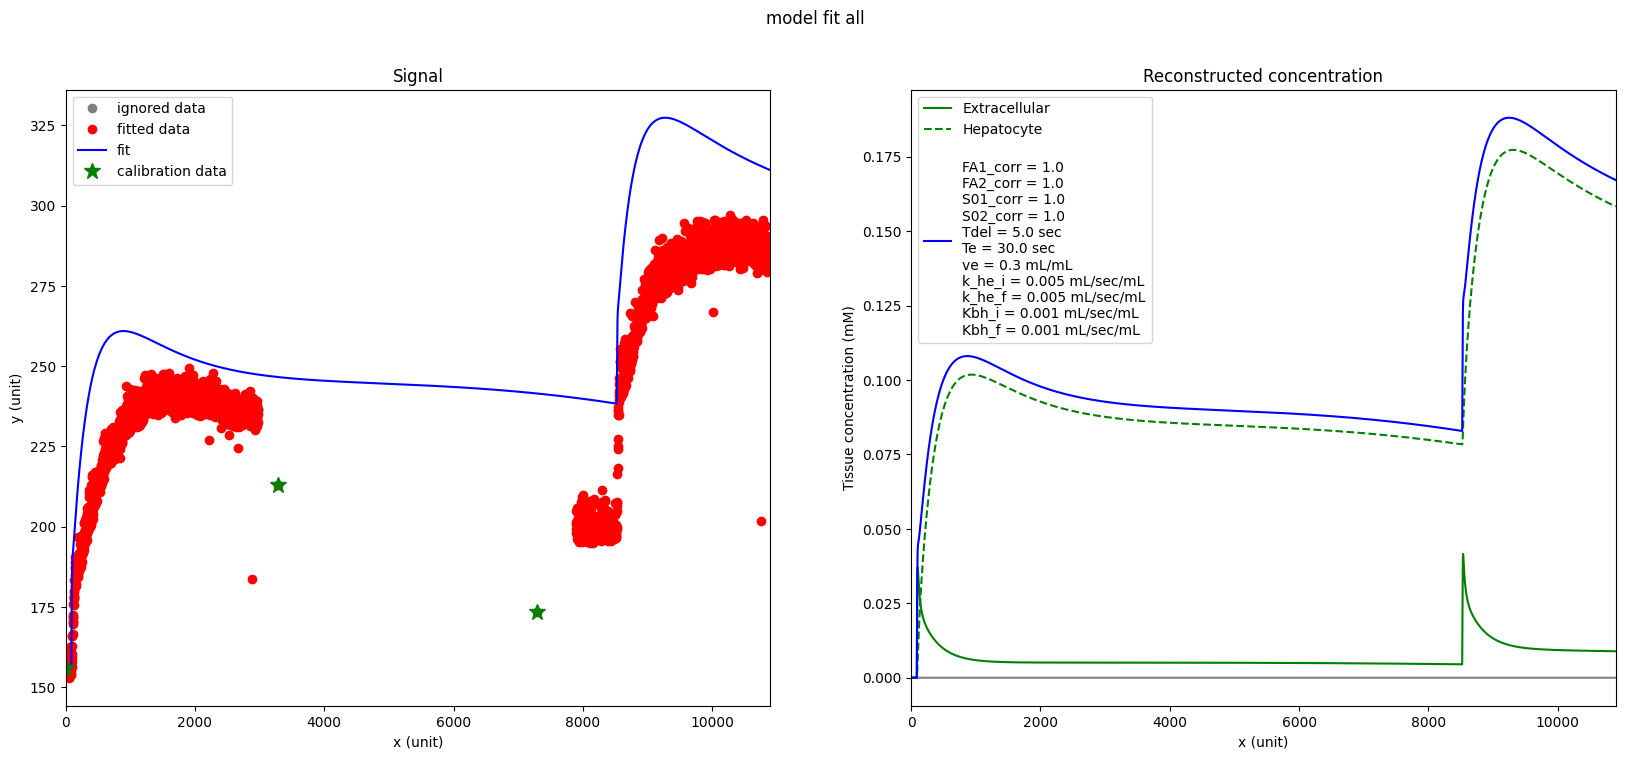

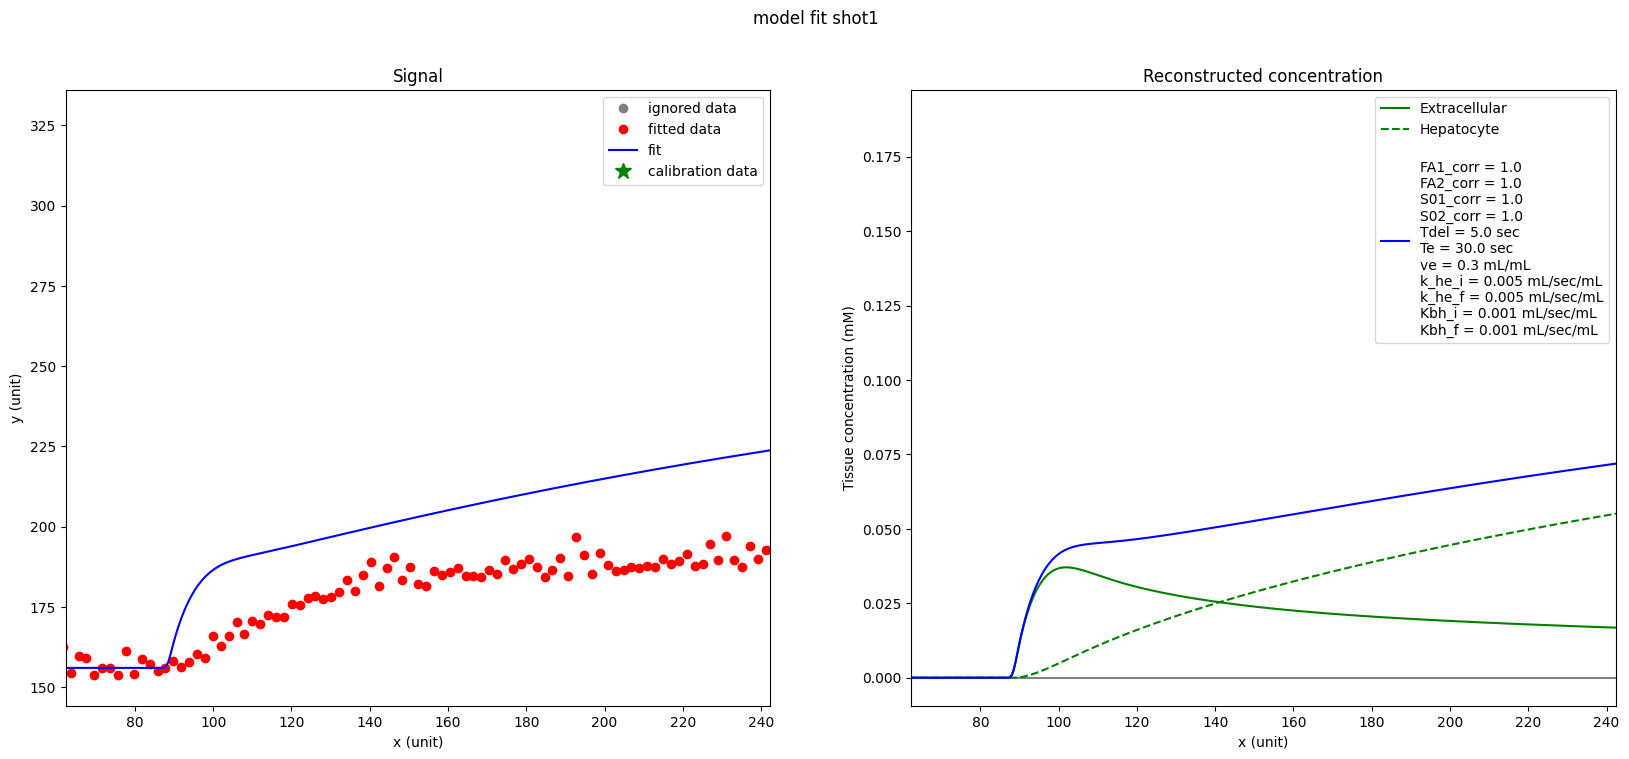

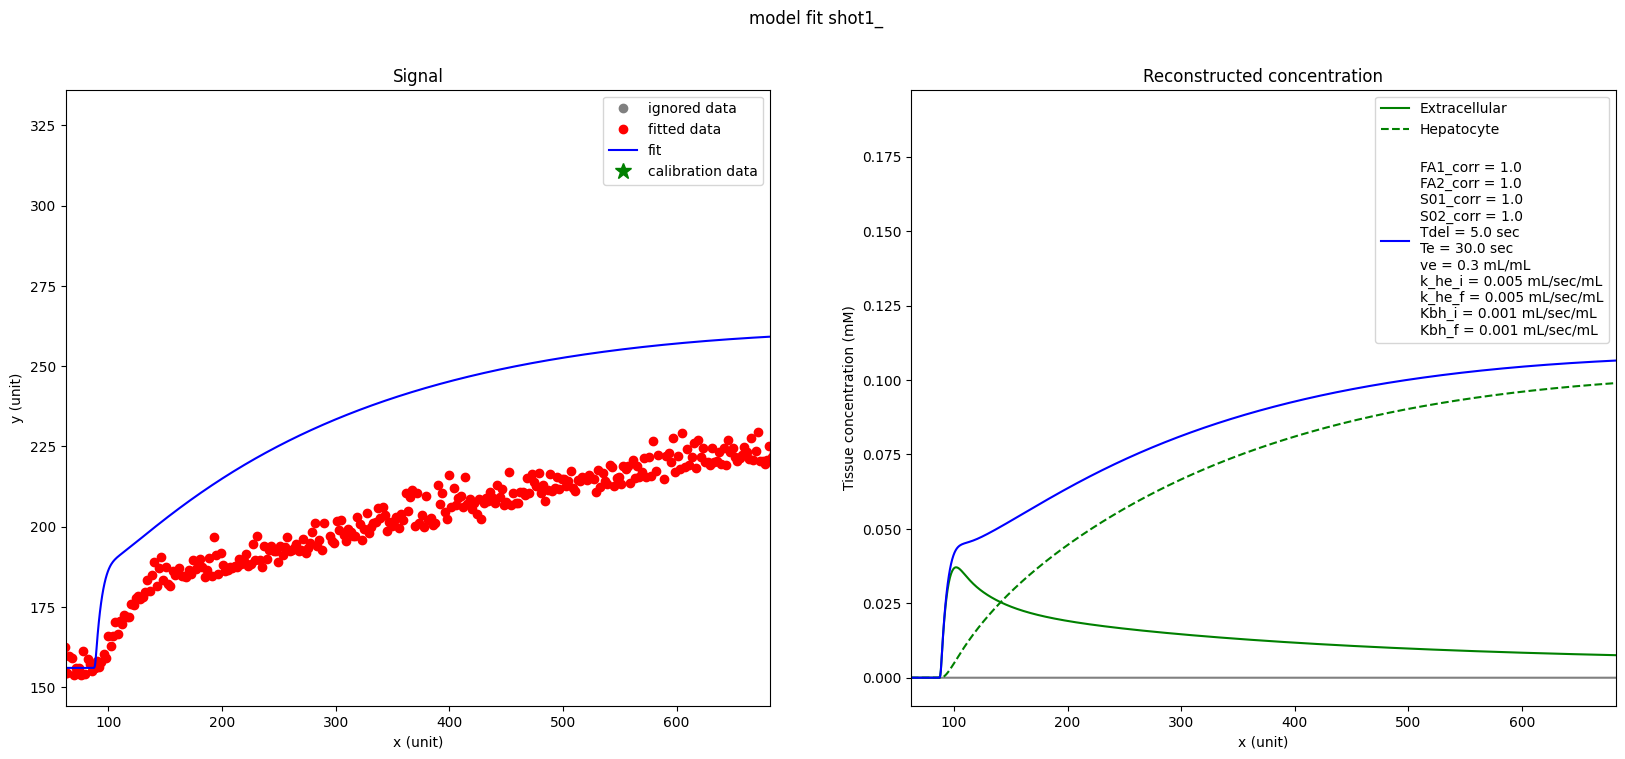

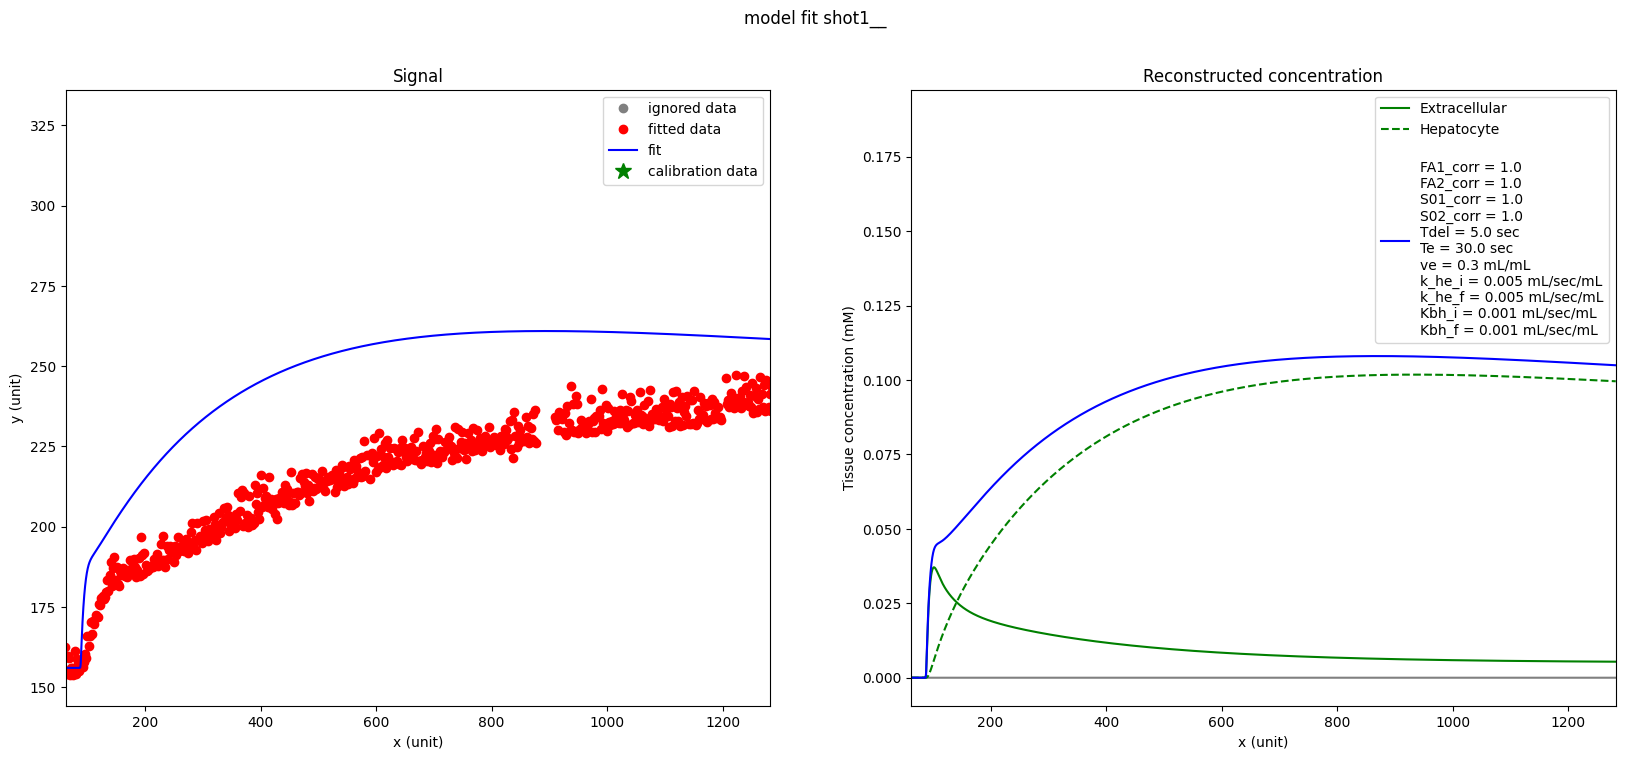

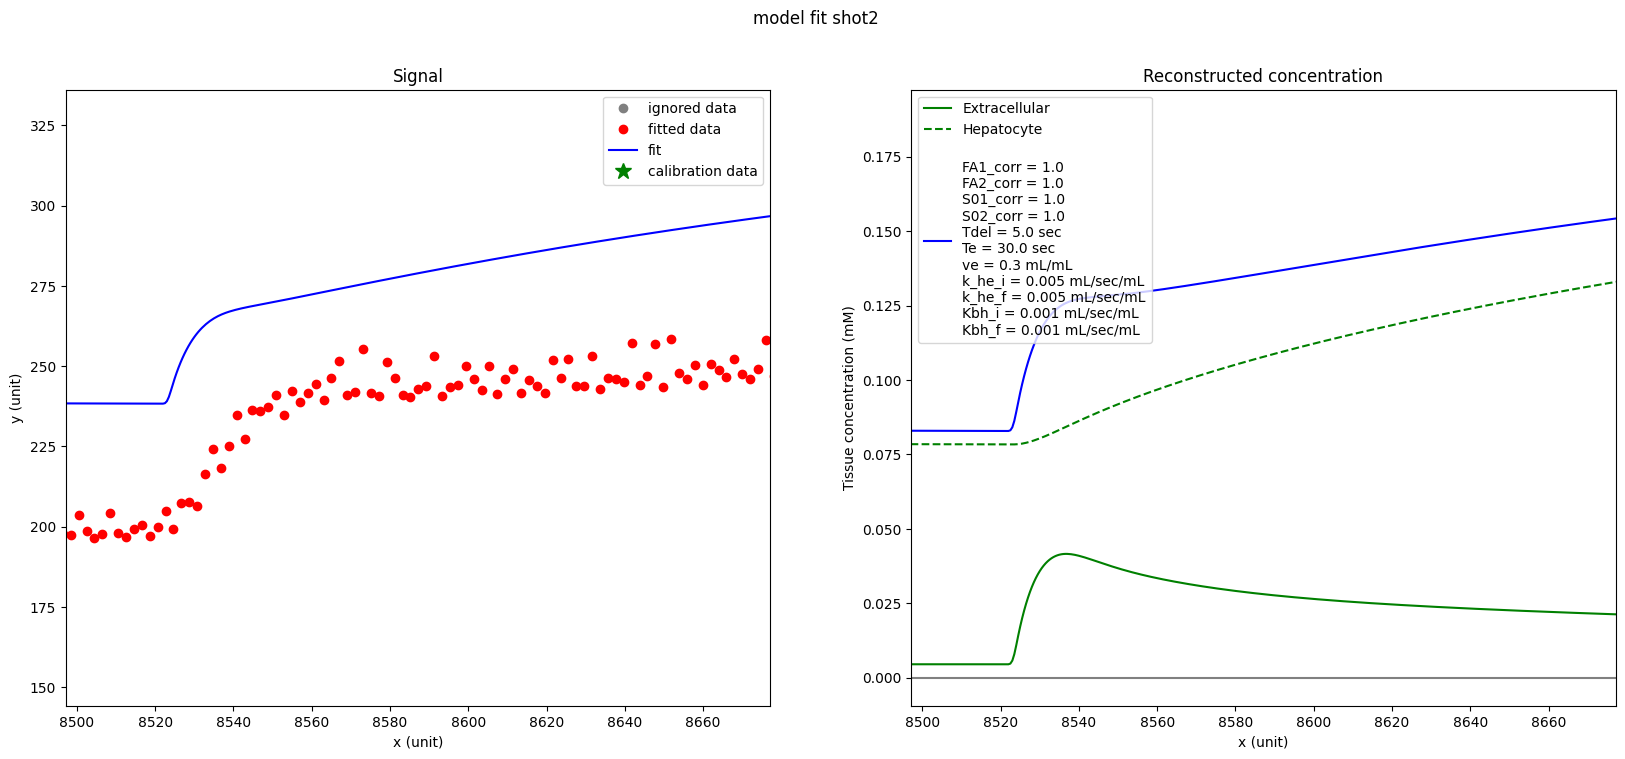

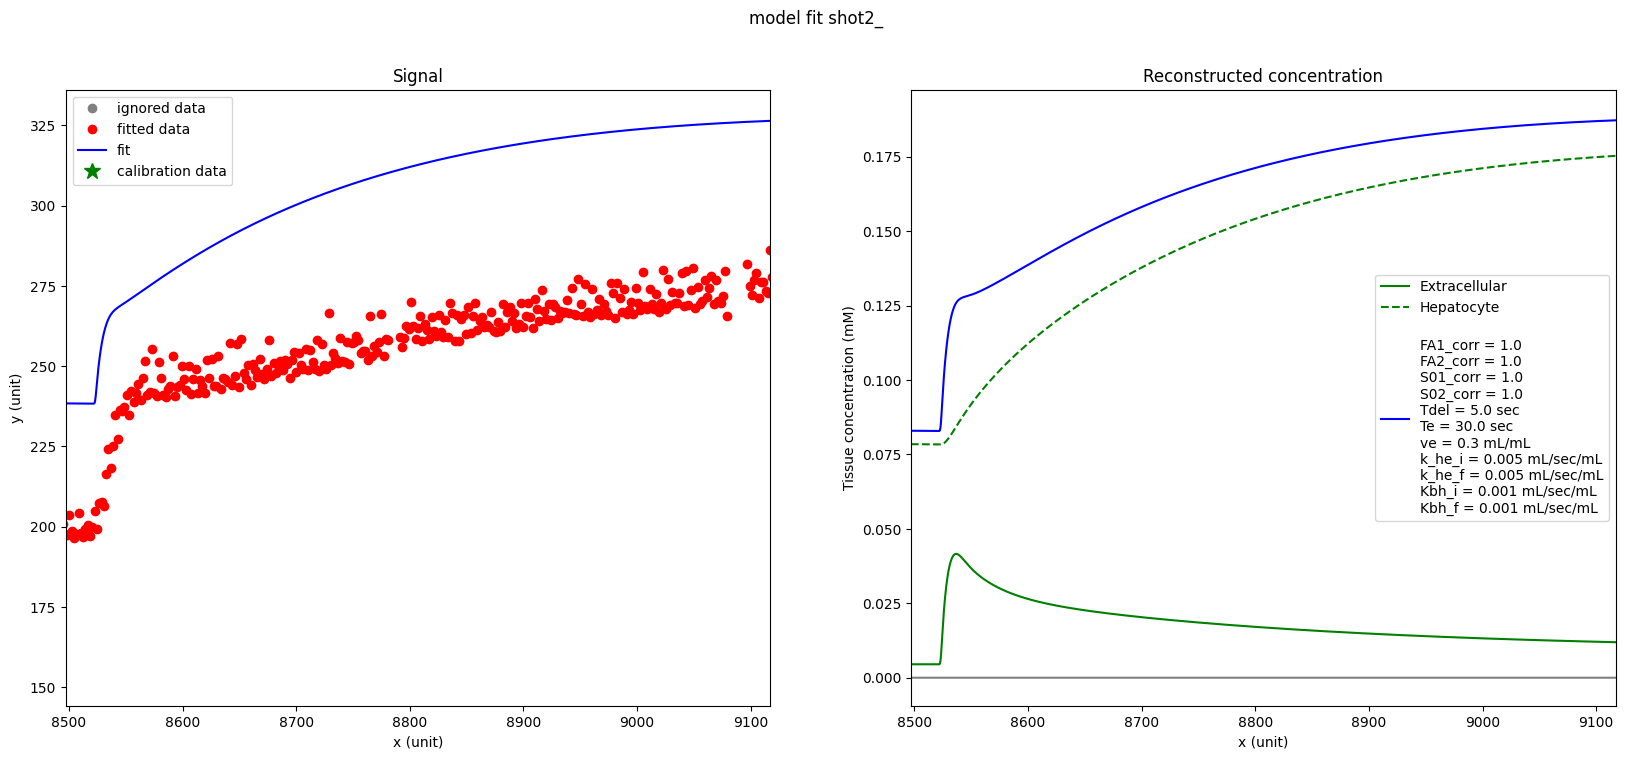

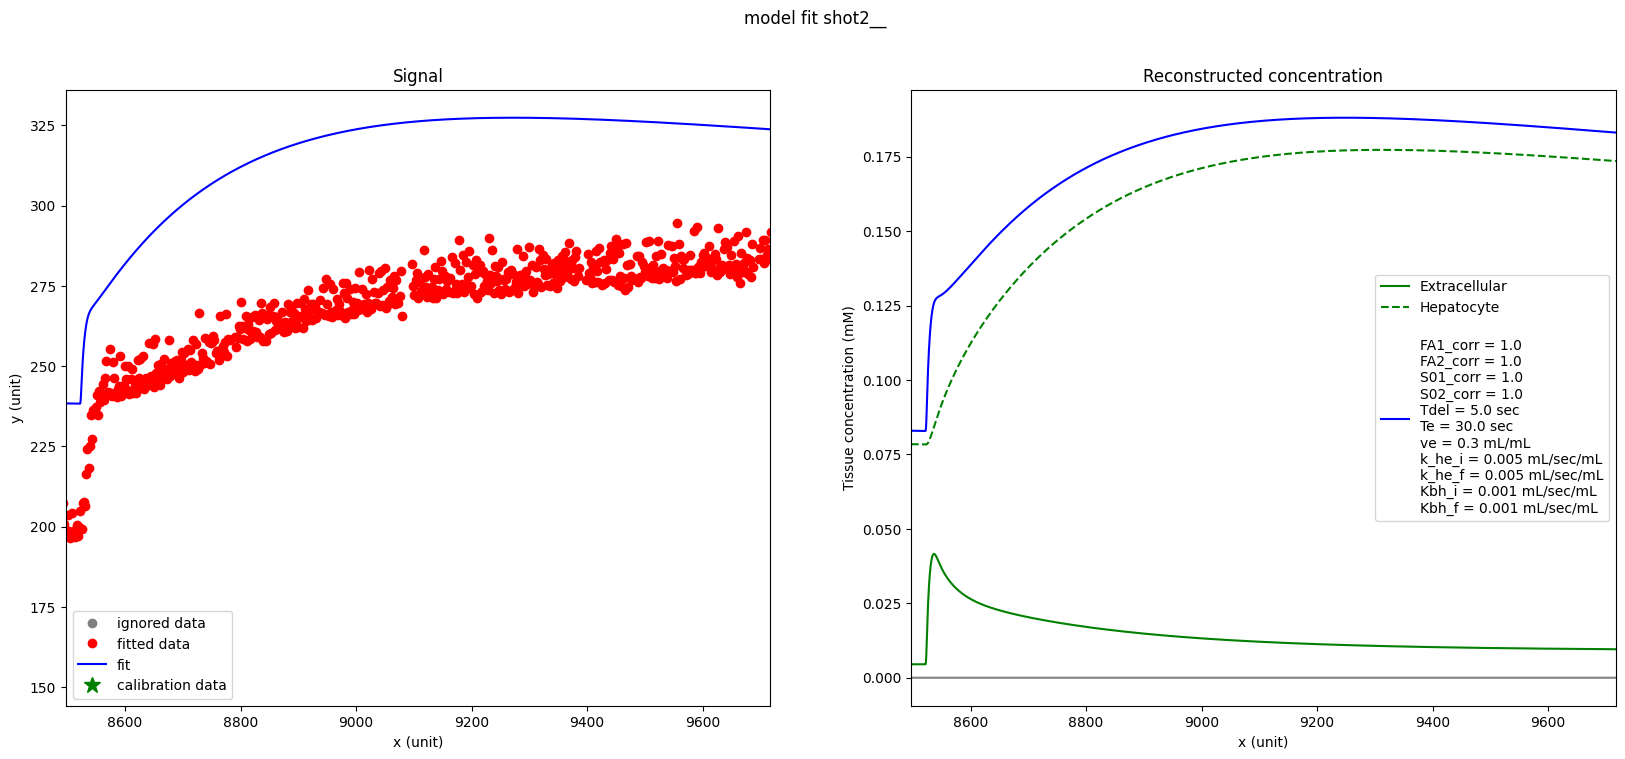

In [23]:
liver.R10 = 1.24
liver.S01 = 1309
liver.S02 = 1309
liver.p.at['S01_corr', 'value'] = 1.0
liver.p.at['S02_corr', 'value'] = 1.0
liver.p.at['Tdel', 'value'] = 5.0
liver.p.at['Te', 'value'] = 30.0
liver.p.at['ve', 'value'] = 0.3
liver.p.at['k_he_i', 'value'] = 0.005
liver.p.at['k_he_f', 'value'] = 0.005
liver.p.at['Kbh_i', 'value'] = 0.001
liver.p.at['Kbh_f', 'value'] = 0.001
liver.plot_fit()

Goodness of fit (%):  3.436163865108996
Goodness of fit (%):  3.9555089487499058


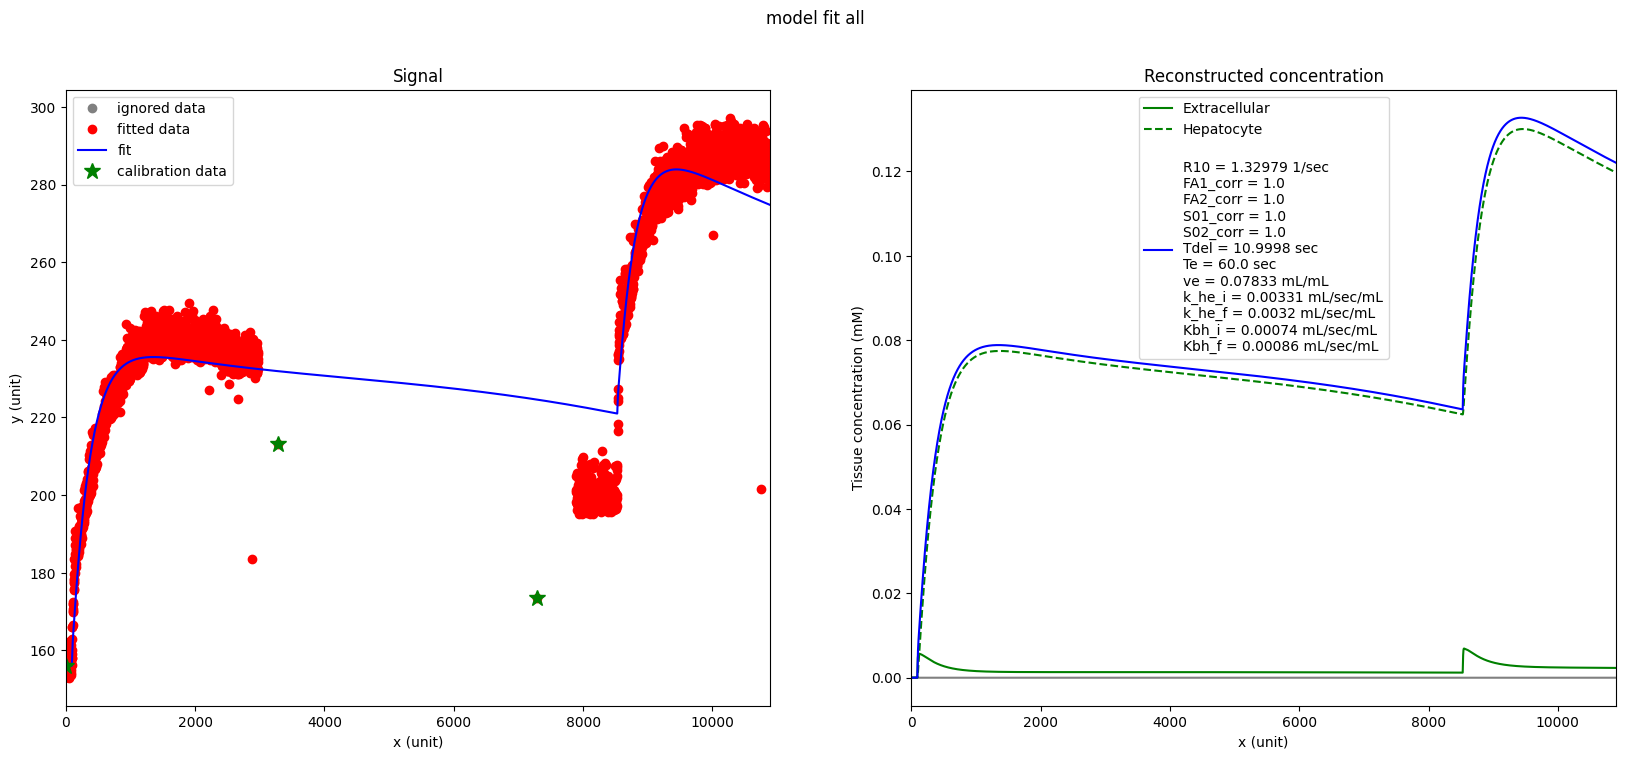

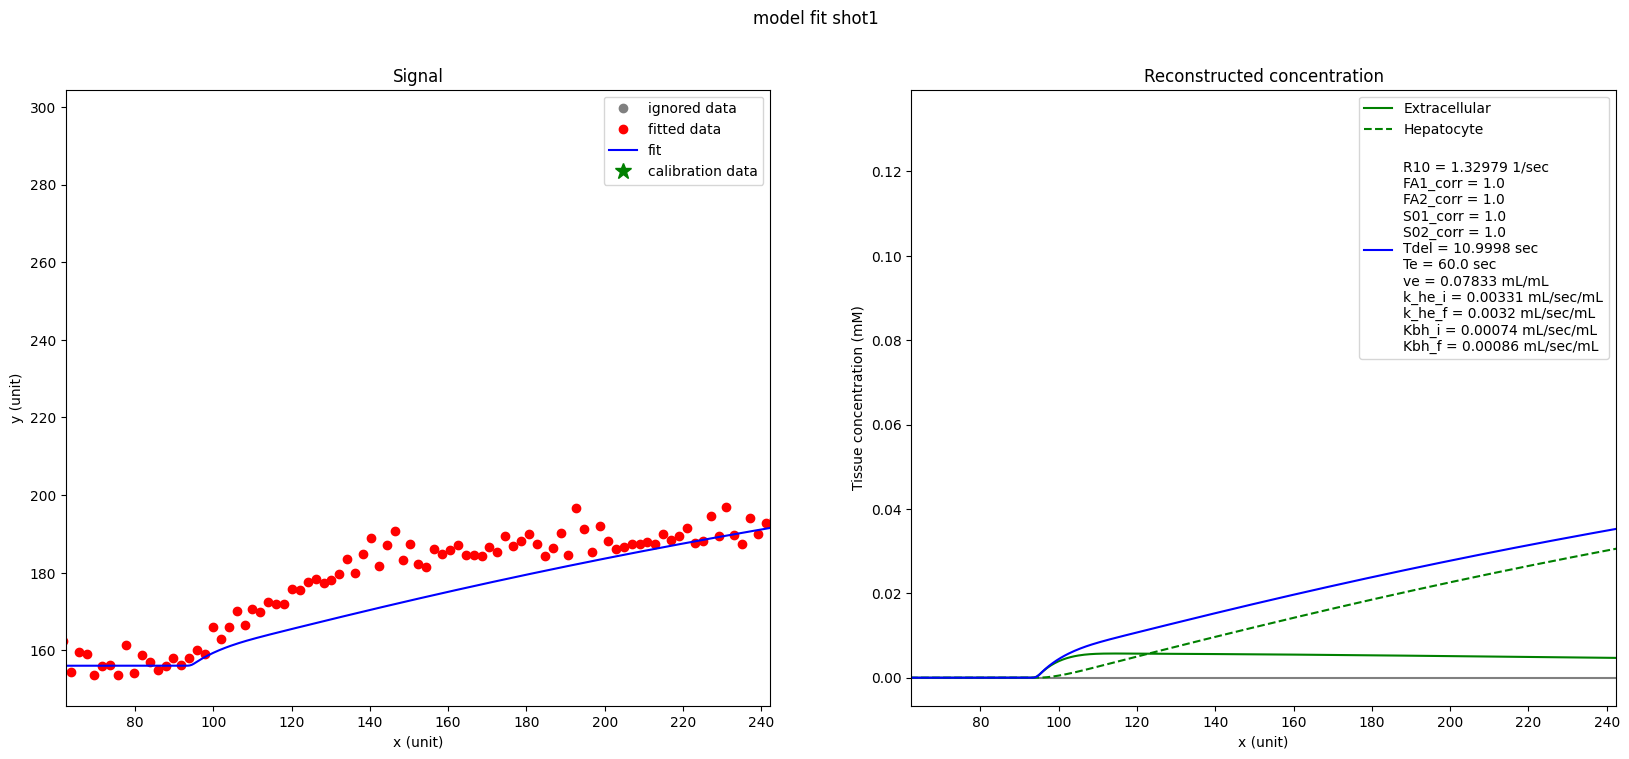

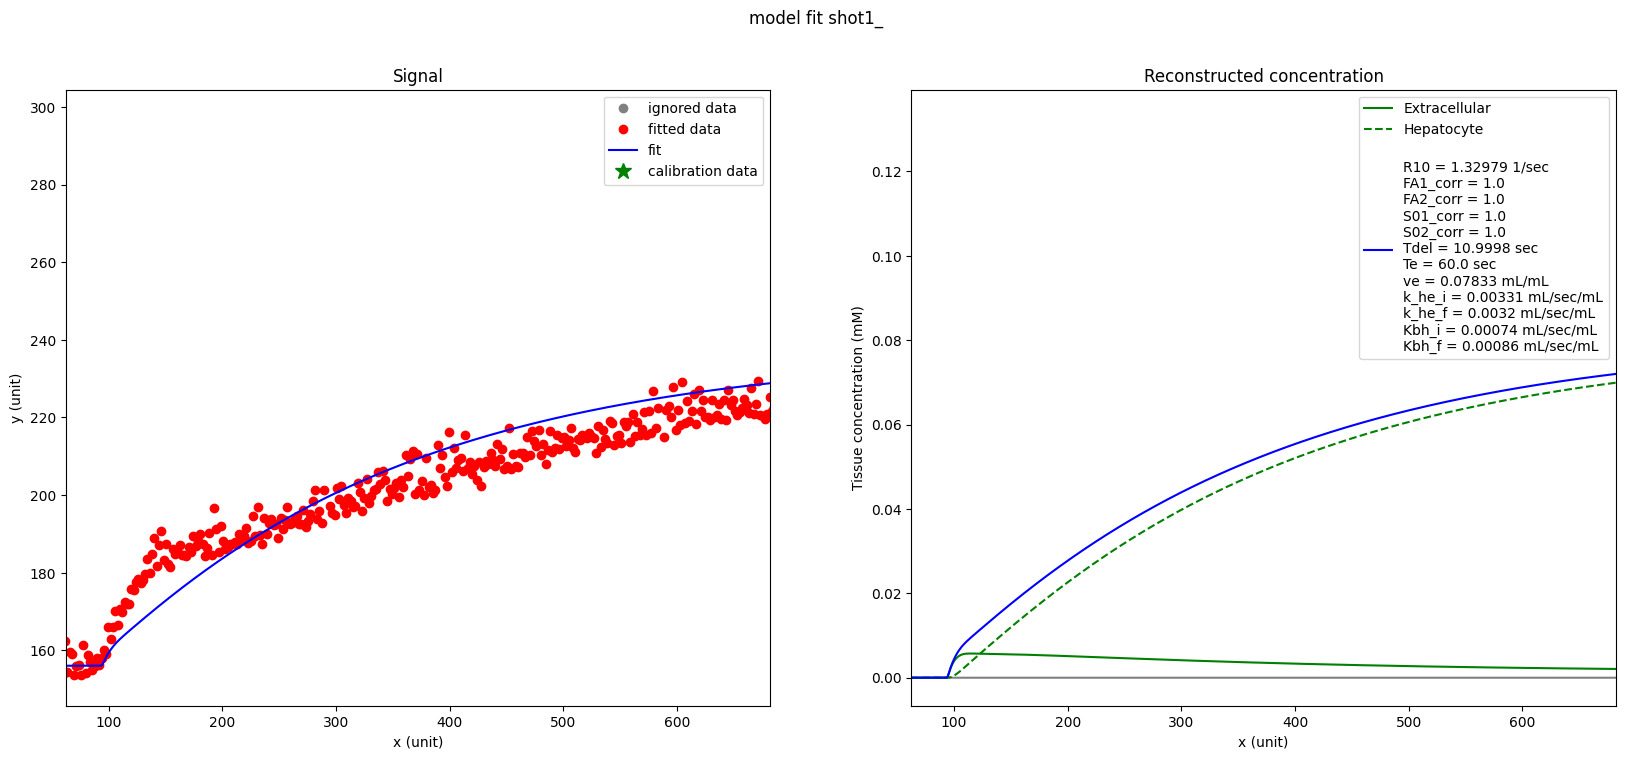

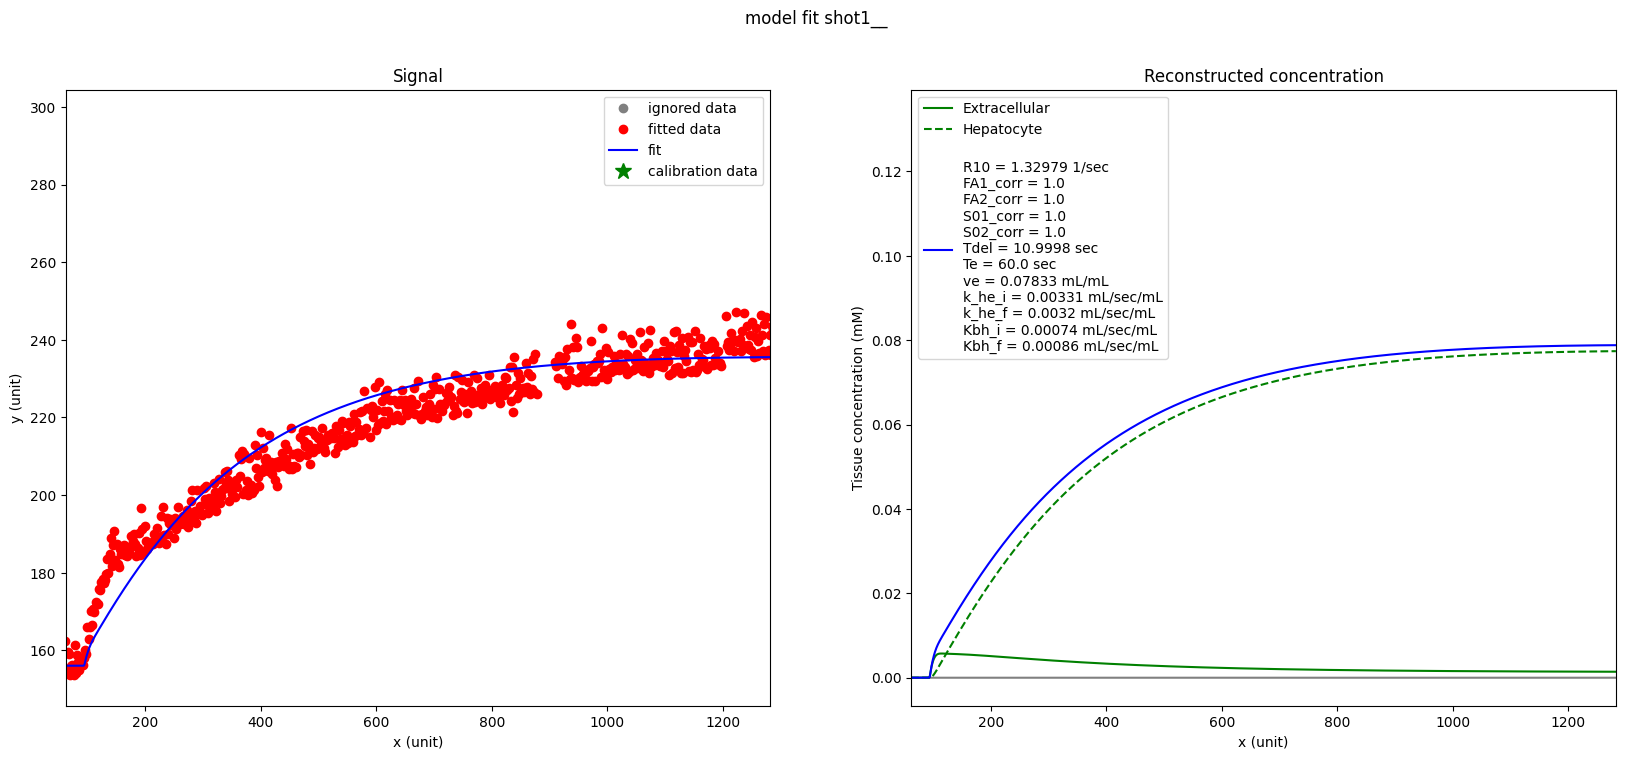

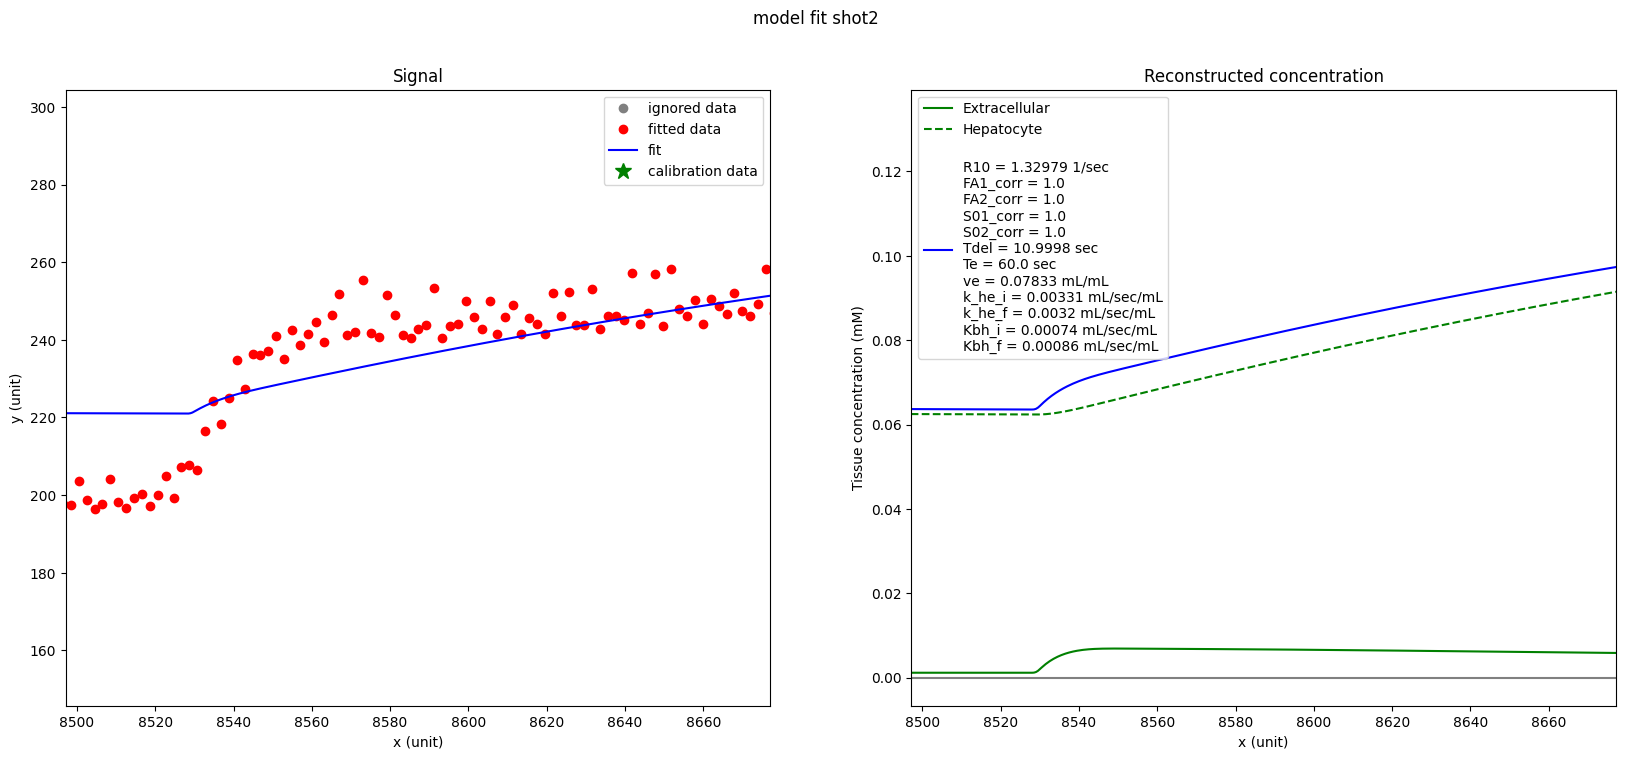

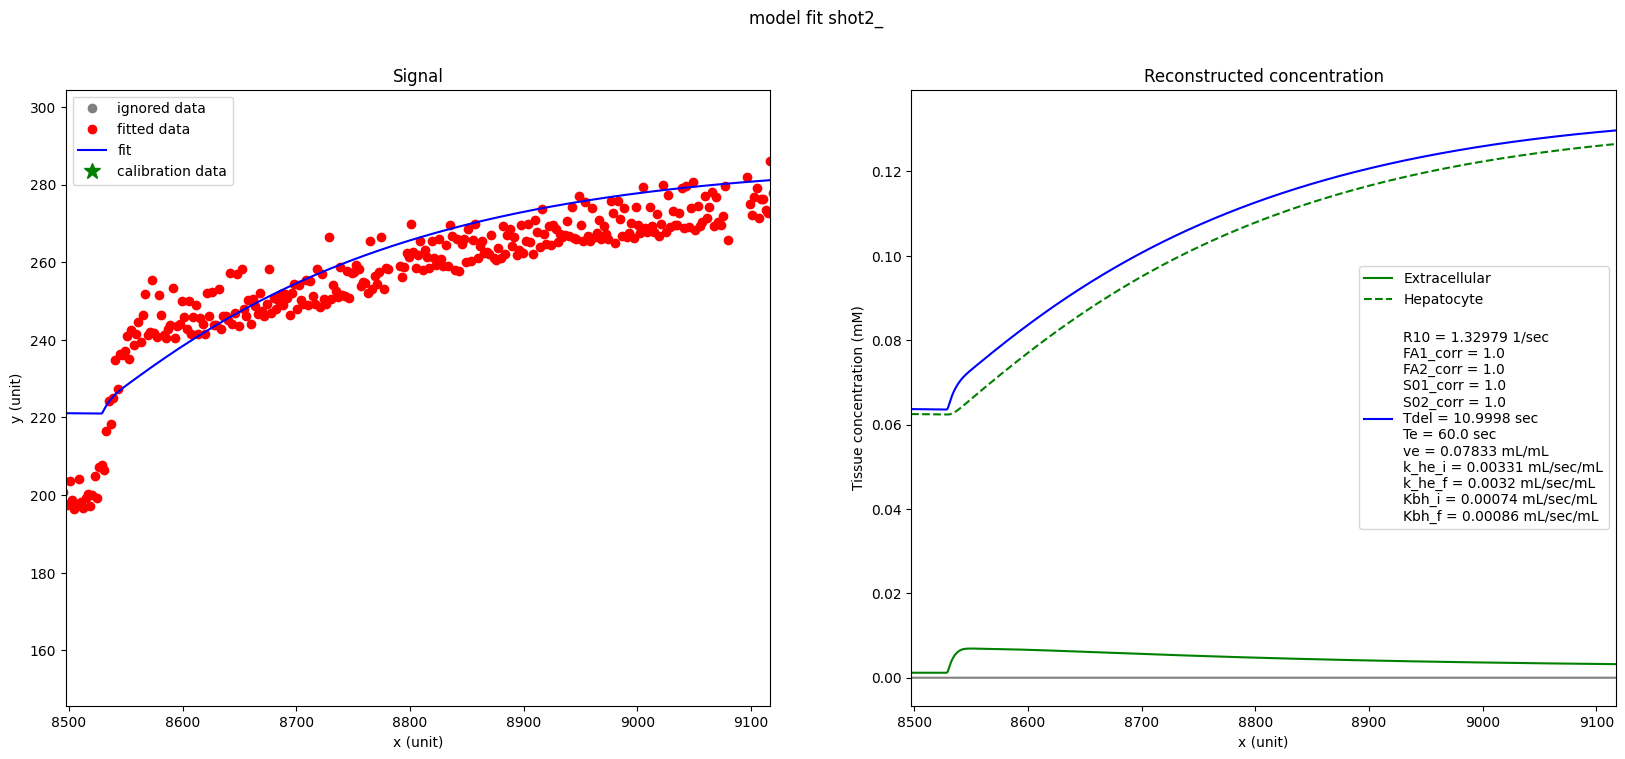

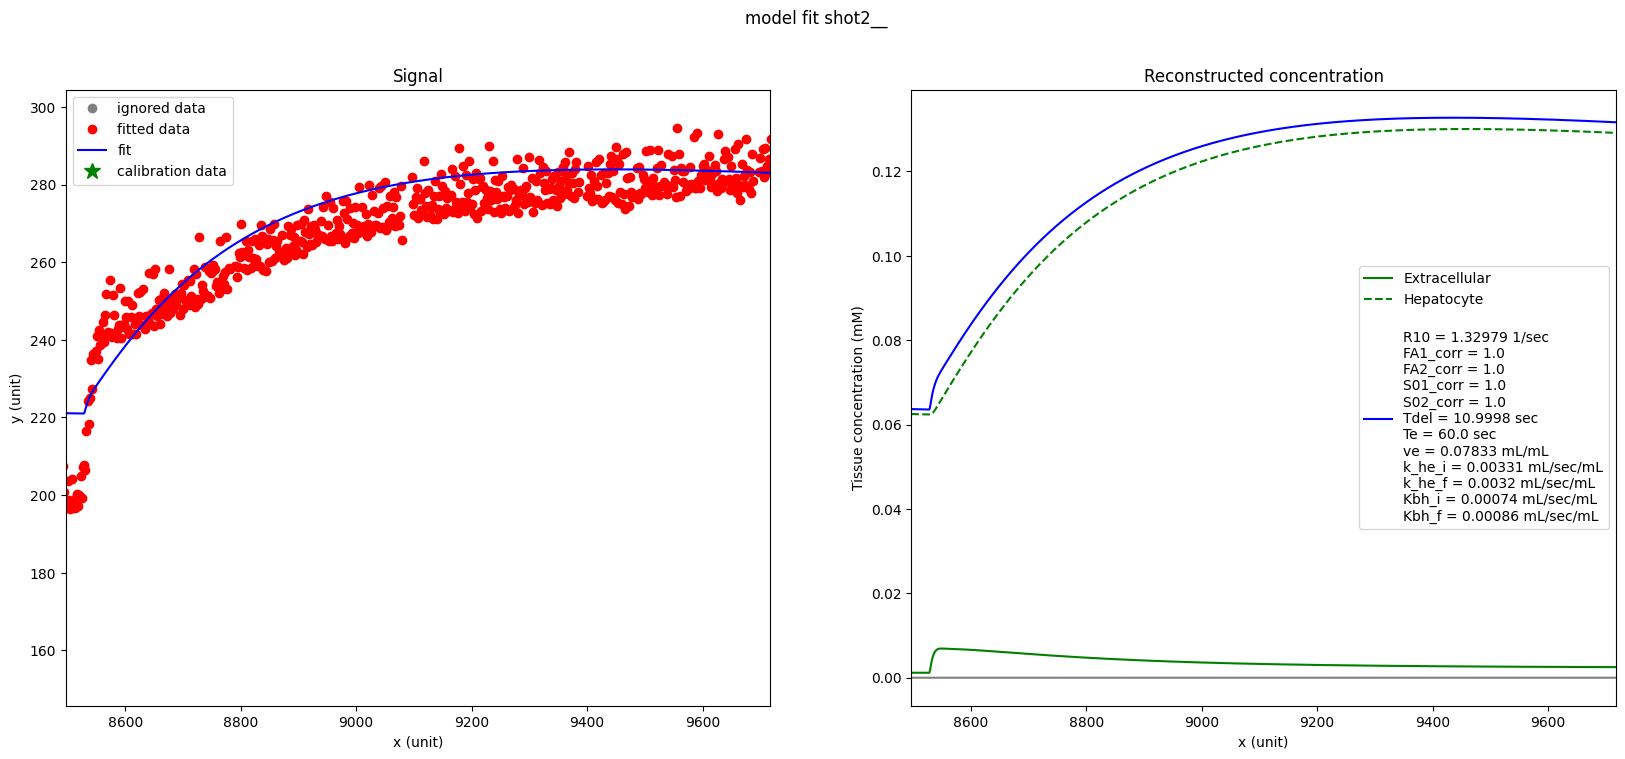

                                            name       value          unit
symbol                                                                    
R10                         Precontrast liver R1    1.329787         1/sec
S01_corr             Signal amplitude correction    1.000000              
S02_corr             Signal amplitude correction    1.000000              
Tdel                              Gut delay time   10.999788           sec
Te                    Extracellular transit time    1.000000           min
ve                 Extracellular volume fraction    7.833473      mL/100mL
k_he_i                Hepatocellular uptake rate   19.850961  mL/min/100mL
k_he_f                Hepatocellular uptake rate   19.191030  mL/min/100mL
Kbh_i              Biliary tissue excretion rate    4.452000  mL/min/100mL
Kbh_f              Biliary tissue excretion rate    5.141577  mL/min/100mL
k_he                  Hepatocellular uptake rate   19.520995  mL/min/100mL
k_he_var     Hepatocellul

In [17]:
#liver.set_xrange(0, aorta.p.value.BAT1+40)
#liver.set_xrange(0, aorta.t[-1])

# Fit or not
liver.S02 = liver.S01
liver.p.loc['S02_corr', ['fit', 'value', 'lower bound', 'upper bound']] = [False, 1.0, 0.9, 1.1]
#liver.p.at['Te', 'upper bound'] = np.inf
#liver.p.at['ve', 'upper bound'] = np.inf

print('Goodness of fit (%): ', liver.goodness())
liver.fit_p()
print('Goodness of fit (%): ', liver.goodness())
liver.plot_fit()
print(liver.export_p())